# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('./Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('./AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

# print all the columns and rows.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

print('\u0332'.join('\nAZDIAS Shape:\n'), azdias.shape)
print('\u0332'.join('\nAZDIAS Head:\n'), azdias.head(5))
 
print('\u0332'.join('\nAZDIAS Describe:\n'), azdias.describe())
print('\u0332'.join('\nAZDIAS Info:'))
azdias.info() 


̲A̲Z̲D̲I̲A̲S̲ ̲S̲h̲a̲p̲e̲:̲
 (891221, 85)

̲A̲Z̲D̲I̲A̲S̲ ̲H̲e̲a̲d̲:̲
    AGER_TYP  ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  \
0        -1                     2          1            2.0   
1        -1                     1          2            5.0   
2        -1                     3          2            3.0   
3         2                     4          2            2.0   
4        -1                     3          1            5.0   

   FINANZ_MINIMALIST  FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  \
0                  3              4                 3               5   
1                  1              5                 2               5   
2                  1              4                 1               2   
3                  4              2                 5               2   
4                  4              3                 4               1   

   FINANZ_UNAUFFAELLIGER  FINANZ_HAUSBAUER  FINANZTYP  GEBURTSJAHR  \
0                      5                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [4]:
print('\u0332'.join('\nAZDIAS Feature Shape:\n'), feat_info.shape)
print('\u0332'.join('\nAZDIAS Feature Head: \n'), feat_info.head(5))


̲A̲Z̲D̲I̲A̲S̲ ̲F̲e̲a̲t̲u̲r̲e̲ ̲S̲h̲a̲p̲e̲:̲
 (85, 4)

̲A̲Z̲D̲I̲A̲S̲ ̲F̲e̲a̲t̲u̲r̲e̲ ̲H̲e̲a̲d̲:̲ ̲
               attribute information_level         type missing_or_unknown
0              AGER_TYP            person  categorical             [-1,0]
1  ALTERSKATEGORIE_GROB            person      ordinal           [-1,0,9]
2             ANREDE_KZ            person  categorical             [-1,0]
3         CJT_GESAMTTYP            person  categorical                [0]
4     FINANZ_MINIMALIST            person      ordinal               [-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [5]:
# Identify missing or unknown data values and convert them to NaNs.

def convert_missing_to_nan(dataset):
    n_points = dataset.shape[0]
    
    # get the natutal nulls in the dataset
    s_natural_nulls = dataset.isnull().sum()
    
    # walk through the feature summary data and retrieve 'missing_or_unknown' string
    attr_missing = zip(feat_info['attribute'], feat_info['missing_or_unknown'])
    
    for attr, missing in attr_missing:    
        # missing_or_unknown string's format is "['m', 'n']" where m & n are numbers or strings.
        # remove brackets 
        missing = missing.strip('[]')
        
        # if it's an empty string, skip processing of missing_or_unknown
        if (len(missing) != 0):
            
            # find all the values which have to be replaced by NaN and store them in a list
            to_replace = []
            
            for x in missing.split(','):
                
                # str.isnumeric() returns False for negative numbers,
                # so check for negative numbers explicitly before
                # invoking isnumeric(). Also, not all values are integers,
                # there are strings like 'X' and 'XX', don't change them.
                if (x[0] == '-' or x.isnumeric()):
                    to_replace.append(int(x))
                else:
                    to_replace.append(x)
            dataset[attr].replace(to_replace, np.NaN, inplace=True)
        else:
            print('missing_or_unknown list is empty, skipping column: ', attr)
            
    # get the total nulls after replaceing missing_and_unknown with NaNs
    s_null_count = dataset.isnull().sum()
    
    # merge natural and total nulls into a dataframe
    nulls = pd.concat([s_natural_nulls, s_null_count], axis=1).reset_index()
    
    # assign column names
    nulls.columns = ['column_name', 'natural_nulls', 'null_count']
    
    # calculate the percentage of nulls in each column and store in a new column.
    nulls['percentage'] = nulls['null_count'].divide(dataset.shape[0]).multiply(100).round(2)
    
    return nulls


nulls = convert_missing_to_nan(azdias)
print("\n", nulls.sort_values('null_count'))

missing_or_unknown list is empty, skipping column:  GFK_URLAUBERTYP
missing_or_unknown list is empty, skipping column:  GREEN_AVANTGARDE
missing_or_unknown list is empty, skipping column:  ANZ_PERSONEN
missing_or_unknown list is empty, skipping column:  ANZ_TITEL
missing_or_unknown list is empty, skipping column:  ANZ_HH_TITEL
missing_or_unknown list is empty, skipping column:  KONSUMNAEHE
missing_or_unknown list is empty, skipping column:  GEBAEUDETYP_RASTER
missing_or_unknown list is empty, skipping column:  MOBI_REGIO
missing_or_unknown list is empty, skipping column:  ONLINE_AFFINITAET
missing_or_unknown list is empty, skipping column:  KBA13_ANZAHL_PKW

               column_name  natural_nulls  null_count  percentage
42               ZABEOTYP              0           0        0.00
37            SEMIO_TRADV              0           0        0.00
36          SEMIO_PFLICHT              0           0        0.00
35             SEMIO_KAEM              0           0        0.00
34     

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

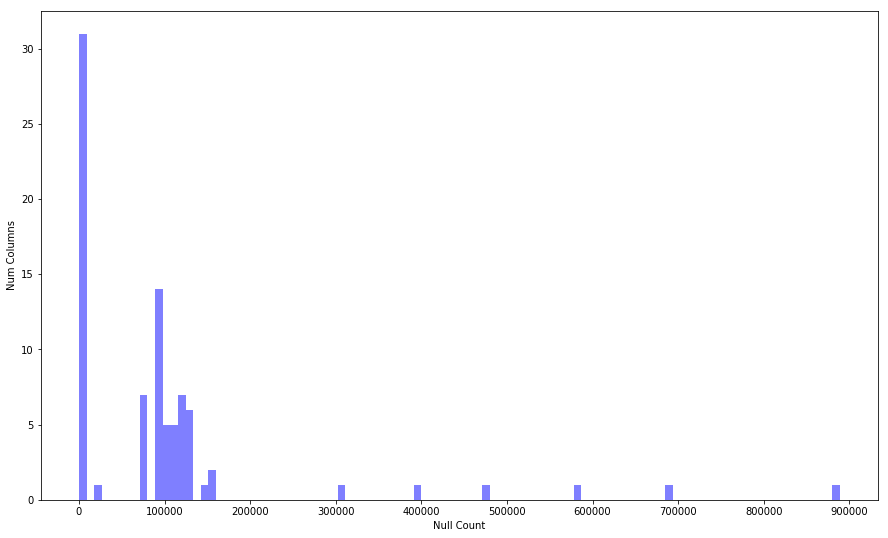

In [6]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# plots histogram of null counts
def plot_columns_with_nulls_histogram():    
    num_bins = 100
    plt.figure(figsize=(15,9))
    plt.xlabel('Null Count')
    plt.ylabel('Num Columns')
    plt.xticks(np.arange(0, 1000000, 100000)) 
    n, bins, patches = plt.hist(nulls['null_count'], num_bins, facecolor='blue', alpha=0.5)
    plt.show()
    
plot_columns_with_nulls_histogram()

In [7]:
# Identify and note the outlier columns

# outliesr columns are those which have more than 'threshold' number of nulls
def get_outlier_columns(threshold):
    outliers = nulls[nulls['null_count'] > threshold]
    return outliers

# from the above histogram, there are 6 outlier columns with more than 200000 NaNs.
# so setting the threshold to 200000 to find them
threshold = 200000
print(get_outlier_columns(threshold).sort_values('null_count'))

     column_name  natural_nulls  null_count  percentage
43      ALTER_HH          73499      310267       34.81
11   GEBURTSJAHR              0      392318       44.02
64  KBA05_BAUMAX         133324      476524       53.47
47  KK_KUNDENTYP         584612      584612       65.60
0       AGER_TYP              0      685843       76.96
40      TITEL_KZ          73499      889061       99.76


In [8]:
# Investigate patterns in the amount of missing data in each column.

# find the columns with the same number of nulls and sort them based on the number of nulls 
def get_duplicated_sorted_columns():
    return nulls[nulls.duplicated('null_count', keep=False)].sort_values('null_count')

print(get_duplicated_sorted_columns())

              column_name  natural_nulls  null_count  percentage
2               ANREDE_KZ              0           0        0.00
37            SEMIO_TRADV              0           0        0.00
36          SEMIO_PFLICHT              0           0        0.00
35             SEMIO_KAEM              0           0        0.00
34              SEMIO_DOM              0           0        0.00
33             SEMIO_KRIT              0           0        0.00
32              SEMIO_RAT              0           0        0.00
31             SEMIO_KULT              0           0        0.00
30              SEMIO_ERL              0           0        0.00
29             SEMIO_LUST              0           0        0.00
28             SEMIO_VERT              0           0        0.00
27              SEMIO_MAT              0           0        0.00
26              SEMIO_REL              0           0        0.00
25              SEMIO_FAM              0           0        0.00
24              SEMIO_SOZ

In [9]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# drops the columns with more than 'threshold' nulls
def dataset_drop_outlier_columns(dataset, thereshold): 
    outlier_columns = get_outlier_columns(threshold)
    print("\nFound {} columns above null threshold {}".format(outlier_columns.shape[0], threshold))
    drop_columns = outlier_columns['column_name'].tolist()
    print('\nDropping following columns from the Dataset: \n', drop_columns)
    print('\nDataset shape before dropping the columns: \n', dataset.shape)
    dataset.drop(drop_columns, axis=1, inplace=True)
    print('\nDataset shape after dropping the columns: \n', dataset.shape)
    return

# drops the columns by column names.
# this function will be utlized later while cleaning the customer dataset
def dataset_drop_outlier_columns_by_name(dataset):
    
    drop_columns = ['ALTER_HH',   
                    'GEBURTSJAHR',
                    'KBA05_BAUMAX',
                    'KK_KUNDENTYP',
                    'AGER_TYP',
                    'TITEL_KZ']
    
    print('\nDataset shape before dropping the columns: \n', dataset.shape)
    dataset.drop(drop_columns, axis=1, inplace=True)
    print('\nDataset shape after dropping the columns: \n', dataset.shape)
    return
 
dataset_drop_outlier_columns(azdias, threshold)


Found 6 columns above null threshold 200000

Dropping following columns from the Dataset: 
 ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']

Dataset shape before dropping the columns: 
 (891221, 85)

Dataset shape after dropping the columns: 
 (891221, 79)


#### Discussion 1.1.2: Assess Missing Data in Each Column

Following table represents missing values per column (sorted by null_count). Missing values (null_count) are a sum of (a) natural missing values in the unprocessed dataset and (b) missing values found by processing "missing_or_unknown" column of the feature summary dataset.

| column_name | null_count | percentage |
| --- | --- | --- |
| ZABEOTYP | 0 | 0.00 |
| SEMIO_TRADV | 0 | 0.00 |
| SEMIO_PFLICHT | 0 | 0.00 |
| SEMIO_KAEM | 0 | 0.00 |
| SEMIO_DOM | 0 | 0.00 |
| SEMIO_KRIT | 0 | 0.00 |
| SEMIO_RAT | 0 | 0.00 |
| SEMIO_KULT | 0 | 0.00 |          
| SEMIO_ERL | 0 | 0.00 |         
| SEMIO_LUST | 0 | 0.00 |          
| SEMIO_VERT | 0 | 0.00 |         
| SEMIO_MAT | 0 | 0.00 |          
| SEMIO_REL | 0 | 0.00 |          
| SEMIO_SOZ | 0 | 0.00 |          
| SEMIO_FAM | 0 | 0.00 |          
| FINANZ_VORSORGER | 0 | 0.00 |          
| ANREDE_KZ | 0 | 0.00 |          
| FINANZ_MINIMALIST | 0 | 0.00 |          
| FINANZ_SPARER | 0 | 0.00 |          
| FINANZ_ANLEGER | 0 | 0.00 |         
| FINANZ_UNAUFFAELLIGER | 0 | 0.00 |         
| FINANZ_HAUSBAUER | 0 | 0.00 |           
| GREEN_AVANTGARDE | 0 | 0.00 |          
| FINANZTYP | 0 | 0.00 |         
| ALTERSKATEGORIE_GROB | 2881 |0.32 |
| GFK_URLAUBERTYP | 4854 | 0.54 |
| LP_STATUS_GROB | 4854 | 0.54 |        
| LP_STATUS_FEIN | 4854 | 0.54 |        
| ONLINE_AFFINITAET | 4854 | 0.54 |        
| RETOURTYP_BK_S | 4854 | 0.54 |        
| CJT_GESAMTTYP | 4854 | 0.54 |        
| HH_EINKOMMEN_SCORE | 18348 | 2.06 |
| WOHNDAUER_2008 | 73499 | 8.25 |
| ANZ_TITEL | 73499 | 8.25 |       
| SOHO_KZ | 73499 | 8.25 |      
| ANZ_PERSONEN | 73499 | 8.25 |       
| KONSUMNAEHE | 73969 | 8.30 |
| LP_FAMILIE_GROB | 77792 | 8.73 |
| LP_FAMILIE_FEIN | 77792 | 8.73 |       
| OST_WEST_KZ | 93148 | 10.45 |
| WOHNLAGE | 93148 | 10.45 |       
| GEBAEUDETYP | 93148 | 10.45 |       
| MIN_GEBAEUDEJAHR | 93148 | 10.45 |       
| GEBAEUDETYP_RASTER | 93148 | 10.45 |       
| BALLRAUM | 93740 | 10.52 |
| EWDICHTE | 93740 | 10.52 |      
| INNENSTADT | 93740 | 10.52 |      
| LP_LEBENSPHASE_GROB | 94572 | 10.61 |
| ANZ_HH_TITEL | 97008 | 10.88  |
| ORTSGR_KLS9 | 97274 | 10.91 |
| ARBEIT | 97375 | 10.93 |
| RELAT_AB | 97375 | 10.93 |       
| LP_LEBENSPHASE_FEIN | 97632 | 10.95 |
| CAMEO_DEUG_2015 | 99352 | 11.15 |
| CAMEO_DEU_2015 | 99352 | 11.15 |       
| CAMEO_INTL_2015 | 99352 | 11.15 |       
| ANZ_HAUSHALTE_AKTIV | 99611 | 11.18 |
| KBA13_ANZAHL_PKW | 105800 | 11.87 |
| PRAEGENDE_JUGENDJAHRE | 108164 | 12.14 |
| NATIONALITAET_KZ | 108315 | 12.15 |
| HEALTH_TYP | 111196 | 12.48 |
| VERS_TYP | 111196 | 12.48 |      
| SHOPPER_TYP | 111196 | 12.48 |      
| PLZ8_ANTG2 | 116515 | 13.07 |
| PLZ8_ANTG3 | 116515 | 13.07 |      
| PLZ8_ANTG1 | 116515 | 13.07 |      
| PLZ8_ANTG4 | 116515 | 13.07 |      
| PLZ8_BAUMAX | 116515 | 13.07 |      
| PLZ8_HHZ | 116515 | 13.07 |     
| PLZ8_GBZ | 116515 | 13.07 |      
| KBA05_ANTG3 | 133324 | 14.96 |
| KBA05_ANTG2 | 133324 | 14.96 |      
| KBA05_ANTG1 | 133324 | 14.96 |      
| MOBI_REGIO | 133324 | 14.96 |     
| KBA05_GBZ | 133324 | 14.96 |      
| KBA05_ANTG4 | 133324 | 14.96 |     
| W_KEIT_KIND_HH | 147988 | 16.61 |
| KKK | 158064 | 17.74 |
| REGIOTYP | 158064 | 17.74 |
| ALTER_HH | 310267 | 34.81 |
| GEBURTSJAHR | 392318 | 44.02 |
| KBA05_BAUMAX | 476524 | 53.47 |
| KK_KUNDENTYP | 584612 | 65.60 |
| AGER_TYP | 685843 | 76.96 |
| TITEL_KZ | 889061 | 99.76 |

SEMIO and FINANZ ordinal columns have 0 missing values. While following six columns have more than 30% missing values and they are obviously outliers and hence are dropped.

| column_name | null_count | percentage |
| --- | --- | --- |
| ALTER_HH | 310267 | 34.81 |
| GEBURTSJAHR | 392318 | 44.02 |
| KBA05_BAUMAX | 476524 | 53.47 |
| KK_KUNDENTYP | 584612 | 65.60 |
| AGER_TYP | 685843 | 76.96 |
| TITEL_KZ | 889061 | 99.76 |

There is an interesting pattern between following sets of columns. They have same amount of missing data.

| column_name | null_count | percentage |
| --- | --- | --- |
| GFK_URLAUBERTYP | 4854 | 0.54 |
| LP_STATUS_GROB | 4854 | 0.54 |        
| LP_STATUS_FEIN | 4854 | 0.54 |        
| ONLINE_AFFINITAET | 4854 | 0.54 |        
| RETOURTYP_BK_S | 4854 | 0.54 |        
| CJT_GESAMTTYP | 4854 | 0.54 |

| column_name | null_count | percentage |
| --- | --- | --- |
| WOHNDAUER_2008 | 73499 | 8.25 |
| ANZ_TITEL | 73499 | 8.25 |       
| SOHO_KZ | 73499 | 8.25 |      
| ANZ_PERSONEN | 73499 | 8.25 |

| column_name | null_count | percentage |
| --- | --- | --- |
| LP_FAMILIE_GROB | 77792 | 8.73 |
| LP_FAMILIE_FEIN | 77792 | 8.73 |

| column_name | null_count | percentage |
| --- | --- | --- |
| OST_WEST_KZ | 93148 | 10.45 |
| WOHNLAGE | 93148 | 10.45 |       
| GEBAEUDETYP | 93148 | 10.45 |       
| MIN_GEBAEUDEJAHR | 93148 | 10.45 |       
| GEBAEUDETYP_RASTER | 93148 | 10.45 |

| column_name | null_count | percentage |
| --- | --- | --- |
| BALLRAUM | 93740 | 10.52 |
| EWDICHTE | 93740 | 10.52 |      
| INNENSTADT | 93740 | 10.52 |

| column_name | null_count | percentage |
| --- | --- | --- |
| ARBEIT | 97375 | 10.93 |
| RELAT_AB | 97375 | 10.93 |

| column_name | null_count | percentage |
| --- | --- | --- |
| CAMEO_DEUG_2015 | 99352 | 11.15 |
| CAMEO_DEU_2015 | 99352 | 11.15 |       
| CAMEO_INTL_2015 | 99352 | 11.15 |

| column_name | null_count | percentage |
| --- | --- | --- | 
| HEALTH_TYP | 111196 | 12.48 |
| VERS_TYP | 111196 | 12.48 |      
| SHOPPER_TYP | 111196 | 12.48 | 

| column_name | null_count | percentage |
| --- | --- | --- |
| PLZ8_ANTG2 | 116515 | 13.07 |
| PLZ8_ANTG3 | 116515 | 13.07 |      
| PLZ8_ANTG1 | 116515 | 13.07 |      
| PLZ8_ANTG4 | 116515 | 13.07 |      
| PLZ8_BAUMAX | 116515 | 13.07 |      
| PLZ8_HHZ | 116515 | 13.07 |     
| PLZ8_GBZ | 116515 | 13.07 | 

| column_name | null_count | percentage |
| --- | --- | --- |
| KBA05_ANTG3 | 133324 | 14.96 |
| KBA05_ANTG2 | 133324 | 14.96 |      
| KBA05_ANTG1 | 133324 | 14.96 |      
| MOBI_REGIO | 133324 | 14.96 |     
| KBA05_GBZ | 133324 | 14.96 |      
| KBA05_ANTG4 | 133324 | 14.96 | 

| column_name | null_count | percentage |
| --- | --- | --- |
| KKK | 158064 | 17.74 |
| REGIOTYP | 158064 | 17.74 |

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

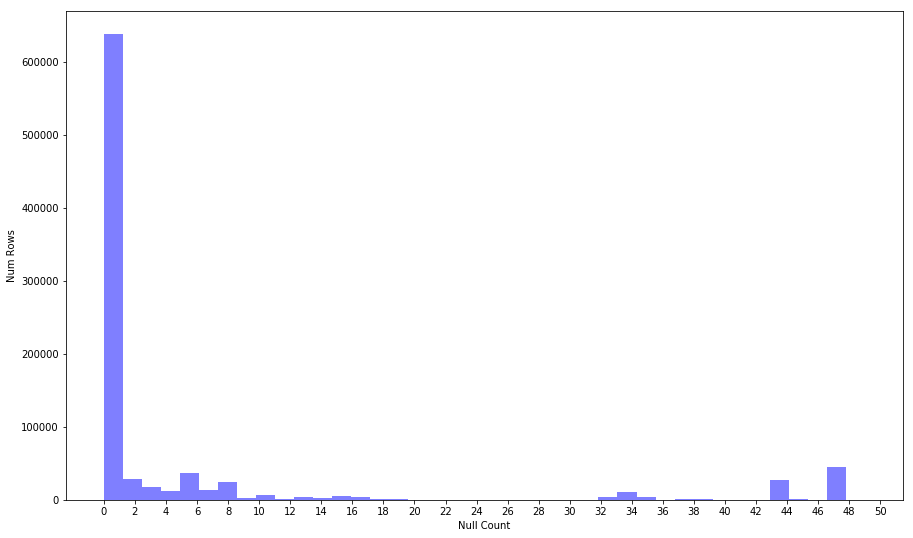

In [10]:
# How much data is missing in each row of the dataset?

# finds the number of nulls in each row
def get_number_of_row_nulls(dataset):
    row_nulls = dataset.isnull().sum(axis=1)    
    df_row_nulls = pd.DataFrame({'row_num':row_nulls.index, 'null_count':row_nulls.values})
    return df_row_nulls

row_nulls = get_number_of_row_nulls(azdias)
row_null_count = row_nulls['null_count'].tolist()

# plot the histogram of the null count per row
num_bins = 40
plt.figure(figsize=(15,9))
plt.xlabel('Null Count')
plt.ylabel('Num Rows')
plt.xticks(np.arange(0, 80, 2)) 
n, bins, patches = plt.hist(row_null_count, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [11]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# splits the dataset into two parts.
# (a) rows with nulls greater than threshold and
# (b) rows with nulls less than or equal to threshold
def split_dataset_based_on_row_nulls(dataset, row_threshold):
    less_data_rows = dataset[dataset.isnull().sum(axis=1) > row_threshold]
    more_data_rows = dataset[dataset.isnull().sum(axis=1) <= row_threshold]
    return less_data_rows, more_data_rows

# returns columns with less than or equal to threshold nulls
def get_columns_below_threshold_nulls(dataset, column_threshold):
    flags = dataset.isnull().sum() <= column_threshold
    below = dataset[flags.index[flags]]
    return below

# creates and returns follwoing dataset subsets and lists
# (a) less_data_rows => rows with more than row_threshold nulls 
# (b) more_data_rows => rows with less than or equal to row_threshold nulls 
# (c) less_data_rows_more_data_columns => less_data_rows with less than column_threshold columns
# (d) more_data_rows_more_data_columns => more_data_rows with less than column_threshold columns
# (e) common_columns => columns which are common between (c) and (d)
def create_row_subsets(dataset, row_threshold, column_threshold):
    less_data_rows, more_data_rows = split_dataset_based_on_row_nulls(dataset, row_threshold)
    print('\u0332'.join('\nLess Data Rows (More Nulls) Shape:\n'), less_data_rows.shape)
    print('\u0332'.join('\nMore Data Rows (Less Nulls)Shape:\n'), more_data_rows.shape)

    less_data_rows_more_data_columns = get_columns_below_threshold_nulls(less_data_rows, column_threshold)
    more_data_rows_more_data_columns = get_columns_below_threshold_nulls(more_data_rows, column_threshold)
    print('\u0332'.join('\nLess Data Rows + More Column Data Shape:\n'), less_data_rows_more_data_columns.shape)
    print('\u0332'.join('\nMore Data Rows + More Column Data Shape:\n'), more_data_rows_more_data_columns.shape)

    common_columns = np.intersect1d(more_data_rows_more_data_columns.columns, less_data_rows_more_data_columns.columns)
    print('\u0332'.join('\nMore Data Common Columns:\n'), common_columns)
    
    return less_data_rows, \
           more_data_rows, \
           less_data_rows_more_data_columns, \
           more_data_rows_more_data_columns, \
           common_columns

# to reduce the number of rows to be dropped, based on the above histogram,
# let's drop rows with more than 9 nulls i.e. row_threshold=9
# let's also find columns with 0 nulls from both the subsets i.e. column_threshold=0
less_data_rows, \
more_data_rows, \
less_data_rows_more_data_columns, \
more_data_rows_more_data_columns, \
common_columns = create_row_subsets(azdias, row_threshold=9, column_threshold=0)


̲L̲e̲s̲s̲ ̲D̲a̲t̲a̲ ̲R̲o̲w̲s̲ ̲(̲M̲o̲r̲e̲ ̲N̲u̲l̲l̲s̲)̲ ̲S̲h̲a̲p̲e̲:̲
 (116478, 79)

̲M̲o̲r̲e̲ ̲D̲a̲t̲a̲ ̲R̲o̲w̲s̲ ̲(̲L̲e̲s̲s̲ ̲N̲u̲l̲l̲s̲)̲S̲h̲a̲p̲e̲:̲
 (774743, 79)

̲L̲e̲s̲s̲ ̲D̲a̲t̲a̲ ̲R̲o̲w̲s̲ ̲+̲ ̲M̲o̲r̲e̲ ̲C̲o̲l̲u̲m̲n̲ ̲D̲a̲t̲a̲ ̲S̲h̲a̲p̲e̲:̲
 (116478, 24)

̲M̲o̲r̲e̲ ̲D̲a̲t̲a̲ ̲R̲o̲w̲s̲ ̲+̲ ̲M̲o̲r̲e̲ ̲C̲o̲l̲u̲m̲n̲ ̲D̲a̲t̲a̲ ̲S̲h̲a̲p̲e̲:̲
 (774743, 39)

̲M̲o̲r̲e̲ ̲D̲a̲t̲a̲ ̲C̲o̲m̲m̲o̲n̲ ̲C̲o̲l̲u̲m̲n̲s̲:̲
 ['ANREDE_KZ' 'FINANZTYP' 'FINANZ_ANLEGER' 'FINANZ_HAUSBAUER'
 'FINANZ_MINIMALIST' 'FINANZ_SPARER' 'FINANZ_UNAUFFAELLIGER'
 'FINANZ_VORSORGER' 'GREEN_AVANTGARDE' 'SEMIO_DOM' 'SEMIO_ERL' 'SEMIO_FAM'
 'SEMIO_KAEM' 'SEMIO_KRIT' 'SEMIO_KULT' 'SEMIO_LUST' 'SEMIO_MAT'
 'SEMIO_PFLICHT' 'SEMIO_RAT' 'SEMIO_REL' 'SEMIO_SOZ' 'SEMIO_TRADV'
 'SEMIO_VERT' 'ZABEOTYP']


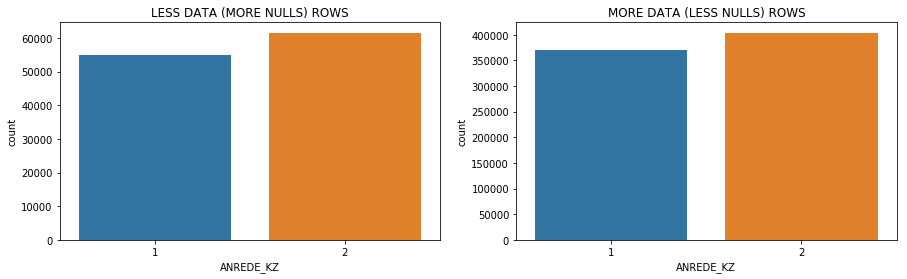

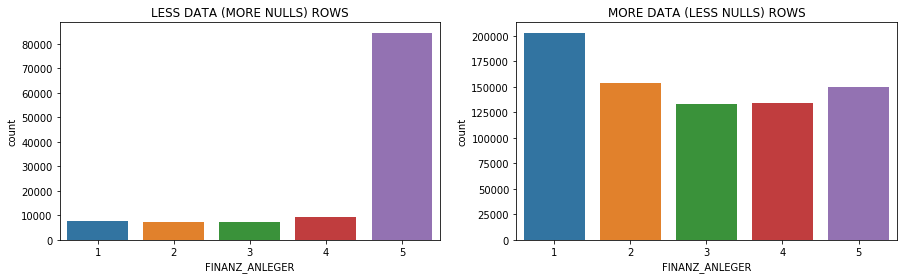

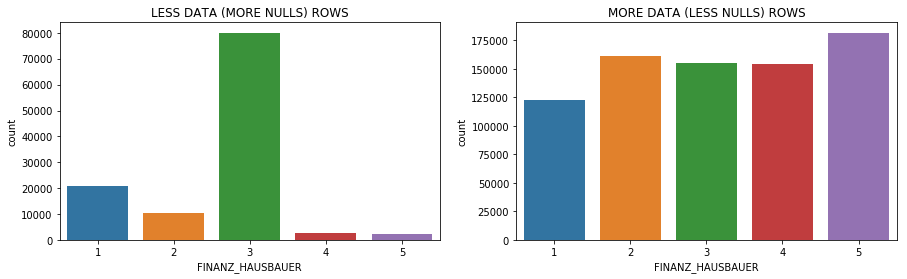

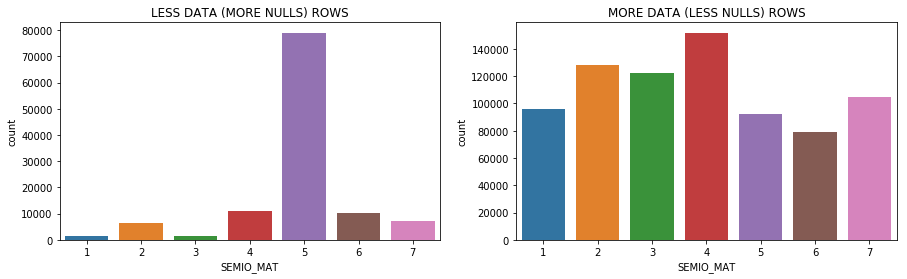

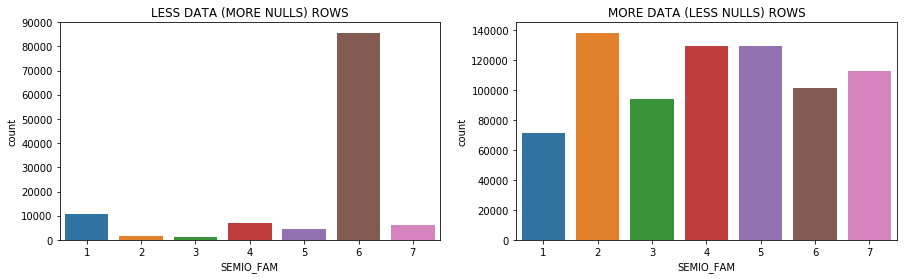

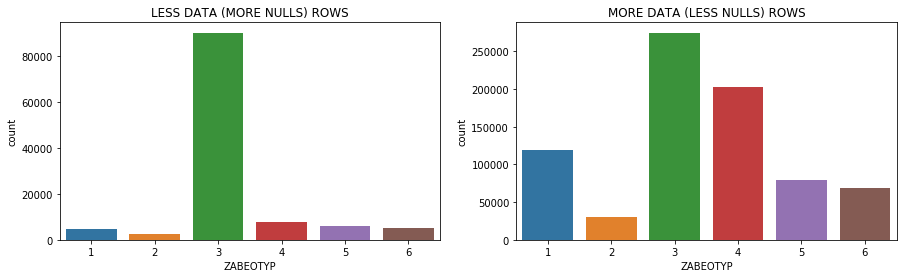

In [12]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# compares a column's distributions across two datasets 
def compare_columns(column_name, less_data_rows, more_data_rows):
    fig, ax =  plt.subplots(1, 2, figsize=(15, 4))
    ax[0].title.set_text('LESS DATA (MORE NULLS) ROWS')
    ax[1].title.set_text('MORE DATA (LESS NULLS) ROWS')
    sns.countplot(less_data_rows[column_name], ax=ax[0])
    sns.countplot(more_data_rows[column_name], ax=ax[1])
    fig.show()
    
# subset of the common_columns between the two datasets (with 0 nulls columns)
plot_columns = ['ANREDE_KZ', 
                'FINANZ_ANLEGER', 
                'FINANZ_HAUSBAUER',
                'SEMIO_MAT',
                'SEMIO_FAM',
                'ZABEOTYP']

# in case, if we want to plot all the common columns instead of the above subset
# plot_columns = common_columns

for column_name in plot_columns:
    compare_columns(column_name, less_data_rows, more_data_rows)

#### Discussion 1.1.3: Assess Missing Data in Each Row

Based on the above histogram, I decided to split the dataset in two parts (a) rows with less than or equal to 9 missing values and (b) rows with more than 9 missing values. By keeping (a) as the new dataset, around 13.07% of rows will be removed from the dataset.

Following columns have zero missing values in both of the above sets. 

'ANREDE_KZ'   
'FINANZTYP'   
'FINANZ_ANLEGER'    
'FINANZ_HAUSBAUER'   
'FINANZ_MINIMALIST'   
'FINANZ_SPARER'   
'FINANZ_UNAUFFAELLIGER'   
'FINANZ_VORSORGER'   
'GREEN_AVANTGARDE'   
'SEMIO_DOM'   
'SEMIO_ERL'   
'SEMIO_FAM'  
'SEMIO_KAEM'   
'SEMIO_KRIT'   
'SEMIO_KULT'   
'SEMIO_LUST'   
'SEMIO_MAT'   
'SEMIO_PFLICHT'   
'SEMIO_RAT'   
'SEMIO_REL'   
'SEMIO_SOZ'   
'SEMIO_TRADV'  
'SEMIO_VERT'   
'ZABEOTYP'

Above countplots compare a few of theses columns (from both the sets). It is evident that the distributions of most of the columns between the two datasets are very different.

In [13]:
# keeps only those rows which have less than or equal to threshold missing values
def dataset_drop_missing_values_rows(dataset, row_threshold):
    n_rows = dataset.shape[0]
    print('\nDataset shape before dropping the rows: \n', dataset.shape)
    dataset = dataset[dataset.isnull().sum(axis=1) <= row_threshold]
    print('\nDataset shape after dropping the rows: \n', dataset.shape)
    n_rows_after_drop = dataset.shape[0]
    n_rows_dropped = n_rows - n_rows_after_drop
    return dataset, n_rows, n_rows_dropped

azdias, n_rows_azdias, n_rows_dropped_azdias = dataset_drop_missing_values_rows(azdias, row_threshold=9)


Dataset shape before dropping the rows: 
 (891221, 79)

Dataset shape after dropping the rows: 
 (774743, 79)


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [14]:
# How many features are there of each data type?

# find the counts of different feature types viz. "categorical", "numeric" etc.
s = feat_info.groupby('type').type.count()
feat_types = pd.DataFrame({'Type':s.index, 'Count':s.values})
print(feat_types)

          Type  Count
0  categorical     21
1     interval      1
2        mixed      7
3      numeric      7
4      ordinal     49


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [15]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# for each categorical type column, checks the. number of unique items in the column
# if there are only two, implies binary
def get_categorical_unique_values(dataset):
    # get all the column names from feat_info where category is 'categorical'
    column_names = feat_info.loc[feat_info['type'] == 'categorical', 'attribute']
    for column_name in column_names:
        # since some columns are removed, check if the column still exists
        if column_name in dataset:
            print("{}: {}".format(column_name, dataset[column_name].unique()))
            
print("\nCategotical Columns with Unique Data\n")
get_categorical_unique_values(azdias)


Categotical Columns with Unique Data

ANREDE_KZ: [2 1]
CJT_GESAMTTYP: [ 5.  3.  2.  4.  1.  6.]
FINANZTYP: [1 6 5 2 4 3]
GFK_URLAUBERTYP: [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   7.   2.   6.]
GREEN_AVANTGARDE: [0 1]
LP_FAMILIE_FEIN: [  5.   1.  nan  10.   2.   7.  11.   8.   4.   6.   9.   3.]
LP_FAMILIE_GROB: [  3.   1.  nan   5.   2.   4.]
LP_STATUS_FEIN: [  2.   3.   9.   4.   1.  10.   5.   8.   6.   7.]
LP_STATUS_GROB: [ 1.  2.  4.  5.  3.]
NATIONALITAET_KZ: [  1.   3.   2.  nan]
SHOPPER_TYP: [  3.   2.   1.   0.  nan]
SOHO_KZ: [ 1.  0.]
VERS_TYP: [  2.   1.  nan]
ZABEOTYP: [5 3 4 1 6 2]
GEBAEUDETYP: [ 8.  1.  3.  2.  6.  4.  5.]
OST_WEST_KZ: ['W' 'O']
CAMEO_DEUG_2015: ['8' '4' '2' '6' '1' '9' '5' '7' '3' nan]
CAMEO_DEU_2015: ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D' '9E'
 '9B' '1B' '3D' nan '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C' '9C'
 '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F' '5F' '1C']


In [16]:
# Re-encode categorical variable(s) to be kept in the analysis.

def reencode_categorical_features(dataset):
    # replace binary variable OST_WEST_KZ's 'O' with 1 and 'W' with 2
    dataset.replace({'OST_WEST_KZ': {'O': 1, 'W': 2}}, inplace=True)
    
    column_names = ['CJT_GESAMTTYP',
                    'FINANZTYP',
                    'GFK_URLAUBERTYP',
                    'LP_FAMILIE_FEIN',
                    'LP_FAMILIE_GROB',
                    'LP_STATUS_FEIN',
                    'LP_STATUS_GROB',
                    'NATIONALITAET_KZ',
                    'SHOPPER_TYP',
                    'ZABEOTYP',
                    'GEBAEUDETYP',
                    'CAMEO_DEUG_2015',
                    'CAMEO_DEU_2015']
    
    # instead of adding dummies, dropping the columns for the time being.                
    # dataset = pd.get_dummies(dataset, columns = column_names)
    
    print('\nDataset shape before dropping the non binary categorical columns: \n', dataset.shape)
    dataset = dataset.drop(column_names, axis=1)
    print('\nDataset shape after dropping the non binary categorical columns: \n', dataset.shape)
    return dataset
                    
azdias = reencode_categorical_features(azdias)


Dataset shape before dropping the non binary categorical columns: 
 (774743, 79)

Dataset shape after dropping the non binary categorical columns: 
 (774743, 66)


#### Discussion 1.2.1: Re-Encode Categorical Features

Out of all the categorical columns following have binary categoricals. 
Replaced OST_WEST_OZ's 'O' by  1 and 'W' by 2.  Kept rest of the binary columns in the dataset.

- ANREDE_KZ: [2 1]  
- GREEN_AVANTGARDE: [0 1]  
- SOHO_KZ: [ 1.  0.]  
- VERS_TYP: [ 2.  1.]  
- OST_WEST_KZ: ['W' 'O']

Initially, I decided to to keep all of the remaining categorical columns as I belive they contain useful information. All of them have 3 or more possible values, I hot encoded them (via Panda's get_dummies). But the column count jumped to more than 160+ columns. I tried PCA and Kmeans with the hot encoded columns and decided to drop these columns instead (to simplify the process).

- CJT_GESAMTTYP: [ 5.  3.  2.  4.  1.  6.]  
- FINANZTYP: [1 5 2 4 6 3]  
- GFK_URLAUBERTYP: [ 10.   5.   1.  12.   9.   3.   8.  11.   4.   7.   6.   2.]  
- LP_FAMILIE_FEIN: [  5.   1.  10.   2.   7.  11.   8.   4.   6.   9.   3.]  
- LP_FAMILIE_GROB: [ 3.  1.  5.  2.  4.]  
- LP_STATUS_FEIN: [  2.   3.   4.   1.  10.   9.   5.   6.   7.   8.]  
- LP_STATUS_GROB: [ 1.  2.  5.  4.  3.]  
- NATIONALITAET_KZ: [ 1.  2.  3.]  
- SHOPPER_TYP: [ 3.  2.  0.  1.]  
- ZABEOTYP: [5 4 1 6 3 2]  
- GEBAEUDETYP: [ 8.  1.  3.  5.]  
- CAMEO_DEUG_2015: ['8' '4' '6' '2' '1' '9' '5' '7' '3']  
- CAMEO_DEU_2015: ['8A' '4C' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5D' '9E' '9B' '1B' '8B' '7A'
 '3D' '4E' '3C' '5A' '7B' '9A' '6E' '6D' '2C' '5C' '9C' '7D' '5E' '1D' '8D'
 '6C' '5B' '7C' '4D' '3A' '2B' '7E' '4B' '2A' '3B' '6F' '5F' '1C' '6A']

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [17]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# -  1: 40s - war years (Mainstream, E+W)
# -  2: 40s - reconstruction years (Avantgarde, E+W)
# -  3: 50s - economic miracle (Mainstream, E+W)
# -  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
# -  5: 60s - economic miracle (Mainstream, E+W)
# -  6: 60s - generation 68 / student protestors (Avantgarde, W)
# -  7: 60s - opponents to the building of the Wall (Avantgarde, E)
# -  8: 70s - family orientation (Mainstream, E+W)
# -  9: 70s - peace movement (Avantgarde, E+W)
# - 10: 80s - Generation Golf (Mainstream, W)
# - 11: 80s - ecological awareness (Avantgarde, W)
# - 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
# - 13: 80s - Swords into ploughshares (Avantgarde, E)
# - 14: 90s - digital media kids (Mainstream, E+W)
# - 15: 90s - ecological awareness (Avantgarde, E+W)

# uses a translation list to derive the decade from the input value.
def get_decade(x):
    # check if input is NaN, if so do not process it
    if x != x:
        return x
    else:
        # 1 => 40s, 2 => 50s and so on.
        translate = [1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6 ]
        return translate[int(x)-1]

# uses a translation list to derive the movement from the input value.
def get_movement(x):
    # check if input is NaN, if so do not process it
    if x != x:
        return x
    else:
        # 1 => Mainstream, 2 => Avantgarde.
        translate = [1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2]
        return translate[int(x)-1]

# processes 'PRAEGENDE_JUGENDJAHRE' column to decode 'decade' and 'movement' into two new columns 
# and drops 'PRAEGENDE_JUGENDJAHRE'
def decode_decades_movement(dataset):
    print('\nDataset shape before decoding "PRAEGENDE_JUGENDJAHRE" column: \n', dataset.shape)
    dataset['PRAEGENDE_JUGENDJAHRE_DECADE'] = dataset['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: get_decade(x))
    dataset['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = dataset['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: get_movement(x))
    print('\nDataset shape after decoding "PRAEGENDE_JUGENDJAHRE" column: \n', dataset.shape)
        
    dataset = dataset.drop('PRAEGENDE_JUGENDJAHRE', axis=1)
    print('\nDataset shape after dropping "PRAEGENDE_JUGENDJAHRE" column: \n', dataset.shape)
    return  dataset

azdias = decode_decades_movement(azdias)


Dataset shape before decoding "PRAEGENDE_JUGENDJAHRE" column: 
 (774743, 66)

Dataset shape after decoding "PRAEGENDE_JUGENDJAHRE" column: 
 (774743, 68)

Dataset shape after dropping "PRAEGENDE_JUGENDJAHRE" column: 
 (774743, 67)


In [18]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# - 11: Wealthy Households - Pre-Family Couples & Singles
# - 12: Wealthy Households - Young Couples With Children
# - 13: Wealthy Households - Families With School Age Children
# - 14: Wealthy Households - Older Families &  Mature Couples
# - 15: Wealthy Households - Elders In Retirement
# - 21: Prosperous Households - Pre-Family Couples & Singles
# - 22: Prosperous Households - Young Couples With Children
# - 23: Prosperous Households - Families With School Age Children
# - 24: Prosperous Households - Older Families & Mature Couples
# - 25: Prosperous Households - Elders In Retirement
# - 31: Comfortable Households - Pre-Family Couples & Singles
# - 32: Comfortable Households - Young Couples With Children
# - 33: Comfortable Households - Families With School Age Children
# - 34: Comfortable Households - Older Families & Mature Couples
# - 35: Comfortable Households - Elders In Retirement
# - 41: Less Affluent Households - Pre-Family Couples & Singles
# - 42: Less Affluent Households - Young Couples With Children
# - 43: Less Affluent Households - Families With School Age Children
# - 44: Less Affluent Households - Older Families & Mature Couples
# - 45: Less Affluent Households - Elders In Retirement
# - 51: Poorer Households - Pre-Family Couples & Singles
# - 52: Poorer Households - Young Couples With Children
# - 53: Poorer Households - Families With School Age Children
# - 54: Poorer Households - Older Families & Mature Couples
# - 55: Poorer Households - Elders In Retirement

# retruns tens place of the input number 
def get_tens_place(x):
    # check if input is NaN, if so do not process it
    if x != x:
        return x
    else:
        return int(float(x))//10

# returns ones place of the input number 
def get_ones_place(x):
    # check if input is NaN, if so do not process it
    if x != x:
        return x
    else:
        return int(float(x))%10
    
def decode_wealth_life_stage(dataset):
    print('\nDataset shape before decoding "CAMEO_INTL_2015" column: \n', dataset.shape)
    dataset['CAMEO_INTL_2015_WEALTH'] = dataset['CAMEO_INTL_2015'].apply(lambda x: get_tens_place(x))
    dataset['CAMEO_INTL_2015_LIFE_STAGE'] = dataset['CAMEO_INTL_2015'].apply(lambda x: get_ones_place(x))
    print('\nDataset shape before decoding "CAMEO_INTL_2015" column: \n', dataset.shape)

    dataset = dataset.drop('CAMEO_INTL_2015', axis=1)
    print('\nDataset shape after dropping "CAMEO_INTL_2015" column: \n', dataset.shape)
    return dataset
    
azdias = decode_wealth_life_stage(azdias)


Dataset shape before decoding "CAMEO_INTL_2015" column: 
 (774743, 67)

Dataset shape before decoding "CAMEO_INTL_2015" column: 
 (774743, 69)

Dataset shape after dropping "CAMEO_INTL_2015" column: 
 (774743, 68)


#### Discussion 1.2.2: Engineer Mixed-Type Features

I decided to not engineer new features for the following mixed type columns for the reasons given below.

- LP_LEBENSPHASE_FEIN  
- LP_LEBENSPHASE_GROB  
- WOHNLAGE  
- KBA05_BAUMAX  
- PLZ8_BAUMAX 

These mixed type columns do not possess information which can be consistently divided into different groups. 
- For example, most of the the values of <b>LP_LEBENSPHASE_FEIN</b> have marital status, income level and age (e.g. 'single low-income earners of younger age'). But then there are values which can not be decoded into 2 or 3 different values (e.g. 'independent couples'). And the same is the case with <b>LP_LEBENSPHASE_GROB</b>.  

- <b>WOHNLAGE</b> is about quality of the neighboorhood from 'very good' to 'very poor', but then there are qualities which do not specify if they are good, average or poor (e.g. 'rural neighborhood' and 'new building in rural neighborhood')  

- Both <b>KBA05_BAUMAX</b> and <b>PLZ8_BAUMAX</b> have 4 categories for family homes and one category for business building.

Each of the Following mixed type columns has been engineered to create two new features each. 
- PRAEGENDE_JUGENDJAHRE
    - PRAEGENDE_JUGENDJAHRE_DECADE 
    - PRAEGENDE_JUGENDJAHRE_MOVEMENT
    
- CAMEO_INTL_2015
    - CAMEO_INTL_2015_WEALTH
    - CAMEO_INTL_2015_LIFE_STAGE
    
In both the cases, the original columns are dropped.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [19]:
def clean_data(df, row_threshold):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame, Column NaNs Threshold, Row NaNs Threshold
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    nulls = convert_missing_to_nan(df)
    
    
    # remove selected columns and rows, ...
    dataset_drop_outlier_columns_by_name(df)
    # dataset_drop_outlier_columns(azdias, threshold)
    
    
    # drop the rows which have more than 'row_threshold' NaNs
    df, n_rows_df, n_rows_dropped_df = dataset_drop_missing_values_rows(df, row_threshold)
   

    # select, re-encode, and engineer column values.
    df = reencode_categorical_features(df)
    df = decode_decades_movement(df)
    df = decode_wealth_life_stage(df)

    
    # Return the cleaned dataframe.
    return df, n_rows_df, n_rows_dropped_df

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [20]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

# import the required library
from sklearn.preprocessing import Imputer

def replace_nans_with_means(dataset):
    # get all the coluns with NaN (to round off the means later)
    nan_columns = dataset.columns[dataset.isnull().any()].tolist()
    print("Number of NaN columns before cleaning: ", len(nan_columns))
    
    # define imputer, let's use mean. 
    # post cleaning, we will round the mean off to int.
    imputer = Imputer(strategy='mean') 

    # fit on the dataset
    imputer.fit(dataset)

    # transform the dataset
    dataset_clean = pd.DataFrame(imputer.transform(dataset), columns = dataset.columns, index = dataset.index)
    
    nan_columns_post_clean = dataset_clean.columns[dataset_clean.isnull().any()].tolist()
    print("Number of NaN columns after cleaning: ", len(nan_columns_post_clean))
    
    # round off all the means
    for column_name in nan_columns:   
        dataset_clean[column_name] = dataset_clean[column_name].apply(lambda x: round(x))
    
    return dataset_clean


azdias = replace_nans_with_means(azdias)

Number of NaN columns before cleaning:  36
Number of NaN columns after cleaning:  0


In [21]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

# init StandardScaler
scaler = StandardScaler()

# fit on the dataset
fitted_scaler = scaler.fit(azdias)

# transform the dataset and store the clean dataset into a new dataframe
X_azdias = scaler.transform(azdias)

### Discussion 2.1: Apply Feature Scaling

So far 6 outlier columns and 13 categorical columns (with more than 3 values) are dropped. In additon, all the rows with more than 9 missing values per row have been removed. So, in order to not lose any more data, <b>Imputer</b> has been used to repalce NaNs with means of the respective columns. Since all the columns contain integers, post imputing, the means are rounded off to the nearest integer. 

Since all the columns have varied scales, in order to not influence PCA inadvertently, Standrd Scaler is applied to all of them.  

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [22]:
from sklearn.decomposition import PCA

# helper function to create a dataframe with PCA components
# and variance ratios for each feature
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

        
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 9))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [23]:
# Apply PCA to the data.

# let's try with n_components = half of the features 
n_features = azdias.shape[1]
pca = PCA(n_features//2)

# fit and transform the clean dataset
X_pca_azdias = pca.fit_transform(X_azdias)

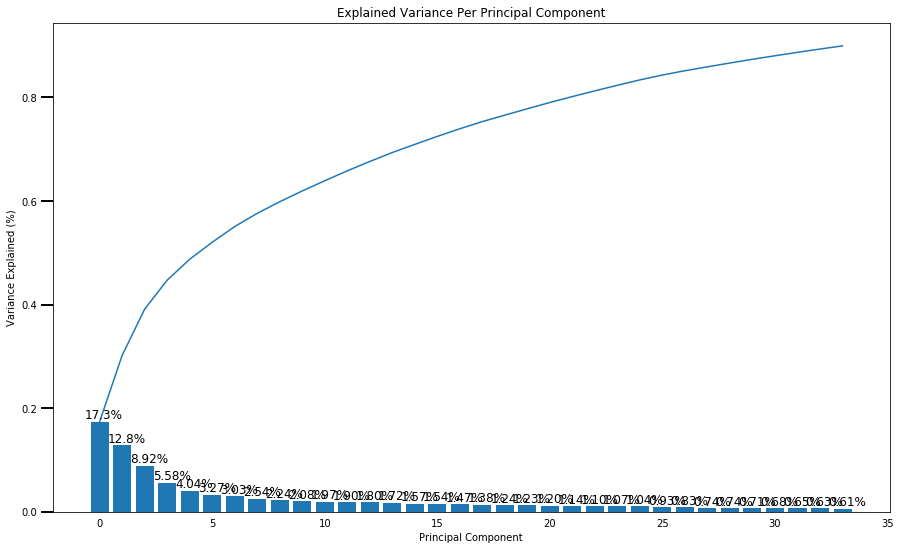

In [24]:
# Investigate the variance accounted for by each principal component.
scree_plot(pca)

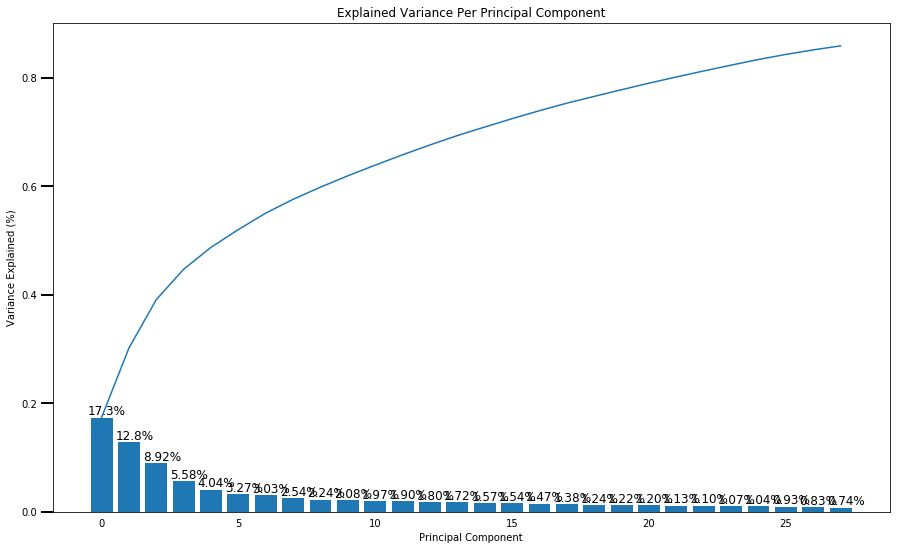

In [25]:
# Re-apply PCA to the data while selecting for number of components to retain.

# based on the above scree_plot select optimum number of n_components
pca = PCA(28)
X_pca_azdias = pca.fit_transform(X_azdias)
scree_plot(pca)

### Discussion 2.2: Perform Dimensionality Reduction

After the cleanup, attempted PCA with n_components equal to half the number of remaining columns and plotted scree plot of pca.explained_variance_ratio_ of each component as well as cummulative variance. At around 28 components, the cummulative variance is around 85%, so initialized the PCA with 28 components and performed fit and transform on the dataset to generate PCA features. 

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [26]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# Retrieve a component's sorted (highest to lowest) variances
# Input: comp_num 1, 2.. upto max number of components
def interpret_pca(variances, comp_num):
    if comp_num > variances.shape[0]:
        print('error: comp_num out of range')
        return
    else:    
        index = 'Dimension ' + str(comp_num)
        s = variances.loc[index, : ]
        s.sort_values(ascending=False, inplace=True)
        return s.to_frame().T
    
# get all the components' variances in a dataframe
azdias_variances = pca_results(azdias, pca)

# interpret and display the variances of the first component
interpret_pca(azdias_variances, 1)

,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,CAMEO_INTL_2015_WEALTH,HH_EINKOMMEN_SCORE,ORTSGR_KLS9,EWDICHTE,Explained Variance,FINANZ_HAUSBAUER,KBA05_ANTG4,PLZ8_ANTG2,ARBEIT,ANZ_HAUSHALTE_AKTIV,RELAT_AB,KBA05_ANTG3,FINANZ_SPARER,SEMIO_PFLICHT,SEMIO_REL,REGIOTYP,SEMIO_RAT,PRAEGENDE_JUGENDJAHRE_DECADE,SEMIO_TRADV,SEMIO_MAT,SEMIO_FAM,W_KEIT_KIND_HH,SEMIO_KULT,FINANZ_UNAUFFAELLIGER,SEMIO_KAEM,FINANZ_ANLEGER,PLZ8_HHZ,ANZ_HH_TITEL,KKK,SEMIO_SOZ,VERS_TYP,SEMIO_DOM,HEALTH_TYP,SEMIO_KRIT,ANREDE_KZ,KBA05_ANTG2,RETOURTYP_BK_S,SOHO_KZ,ANZ_TITEL,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,OST_WEST_KZ,WOHNDAUER_2008,MIN_GEBAEUDEJAHR,ONLINE_AFFINITAET,KBA13_ANZAHL_PKW,FINANZ_VORSORGER,WOHNLAGE,ALTERSKATEGORIE_GROB,ANZ_PERSONEN,GREEN_AVANTGARDE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,GEBAEUDETYP_RASTER,CAMEO_INTL_2015_LIFE_STAGE,BALLRAUM,LP_LEBENSPHASE_GROB,LP_LEBENSPHASE_FEIN,INNENSTADT,PLZ8_GBZ,KONSUMNAEHE,FINANZ_MINIMALIST,KBA05_GBZ,KBA05_ANTG1,PLZ8_ANTG1,MOBI_REGIO
Dimension 1,0.2243,0.2186,0.2139,0.2014,0.1973,0.1969,0.1946,0.1738,0.1639,0.1524,0.1523,0.1414,0.1335,0.1332,0.1282,0.1153,0.0861,0.0832,0.0711,0.0707,0.0705,0.0617,0.0607,0.0601,0.0559,0.0504,0.0497,0.0429,0.0424,0.0418,0.035,0.0342,0.034,0.0327,0.0256,0.0225,0.014,0.0103,0.0088,-0.0011,-0.0022,-0.0036,-0.0399,-0.052,-0.0536,-0.0536,-0.056,-0.0587,-0.0631,-0.0782,-0.0862,-0.0863,-0.088,-0.0948,-0.1036,-0.1036,-0.1169,-0.1181,-0.126,-0.1303,-0.145,-0.1634,-0.1668,-0.1669,-0.1999,-0.2112,-0.217,-0.2239,-0.2364


In [27]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# interpret and display the variances of the second component
interpret_pca(azdias_variances, 2)

,ALTERSKATEGORIE_GROB,FINANZ_VORSORGER,SEMIO_ERL,SEMIO_LUST,RETOURTYP_BK_S,Explained Variance,W_KEIT_KIND_HH,SEMIO_KRIT,SEMIO_KAEM,FINANZ_MINIMALIST,FINANZ_HAUSBAUER,ANREDE_KZ,EWDICHTE,ORTSGR_KLS9,WOHNDAUER_2008,PLZ8_ANTG3,SEMIO_DOM,PLZ8_ANTG4,PLZ8_BAUMAX,KBA05_ANTG4,ARBEIT,RELAT_AB,CAMEO_INTL_2015_WEALTH,PLZ8_ANTG2,ANZ_HAUSHALTE_AKTIV,VERS_TYP,HH_EINKOMMEN_SCORE,ANZ_HH_TITEL,KBA05_ANTG3,CAMEO_INTL_2015_LIFE_STAGE,REGIOTYP,PLZ8_HHZ,ANZ_TITEL,PRAEGENDE_JUGENDJAHRE_MOVEMENT,GREEN_AVANTGARDE,SOHO_KZ,KKK,KBA05_ANTG2,OST_WEST_KZ,LP_LEBENSPHASE_FEIN,KBA13_ANZAHL_PKW,GEBAEUDETYP_RASTER,LP_LEBENSPHASE_GROB,MIN_GEBAEUDEJAHR,BALLRAUM,WOHNLAGE,KBA05_ANTG1,KONSUMNAEHE,PLZ8_GBZ,INNENSTADT,ANZ_PERSONEN,MOBI_REGIO,KBA05_GBZ,HEALTH_TYP,SEMIO_VERT,PLZ8_ANTG1,SEMIO_SOZ,ONLINE_AFFINITAET,SEMIO_MAT,SEMIO_RAT,SEMIO_FAM,FINANZ_ANLEGER,SEMIO_KULT,FINANZ_UNAUFFAELLIGER,SEMIO_TRADV,SEMIO_PFLICHT,FINANZ_SPARER,PRAEGENDE_JUGENDJAHRE_DECADE,SEMIO_REL
Dimension 2,0.2717,0.2439,0.2356,0.1902,0.1655,0.1281,0.1162,0.1134,0.1034,0.0946,0.0938,0.0855,0.0677,0.0665,0.0654,0.0647,0.0645,0.0617,0.0569,0.0503,0.0483,0.047,0.0457,0.0449,0.0442,0.027,0.0266,0.0263,0.0227,0.018,0.0129,0.0086,0.0077,0.0013,0.0013,-0.0018,-0.0064,-0.0097,-0.0178,-0.0236,-0.0256,-0.0287,-0.0317,-0.0398,-0.0448,-0.0463,-0.0465,-0.0481,-0.0503,-0.0538,-0.0551,-0.0565,-0.0582,-0.0608,-0.0612,-0.0618,-0.105,-0.1587,-0.1692,-0.1817,-0.1885,-0.2132,-0.2245,-0.233,-0.2396,-0.2404,-0.2511,-0.2615,-0.2649


In [28]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# interpret and display the variances of the third component
interpret_pca(azdias_variances, 3)

,SEMIO_VERT,SEMIO_SOZ,SEMIO_FAM,SEMIO_KULT,FINANZ_MINIMALIST,RETOURTYP_BK_S,FINANZ_VORSORGER,Explained Variance,W_KEIT_KIND_HH,ALTERSKATEGORIE_GROB,SEMIO_REL,SEMIO_LUST,GREEN_AVANTGARDE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,SEMIO_MAT,ORTSGR_KLS9,PLZ8_BAUMAX,EWDICHTE,PLZ8_ANTG4,PLZ8_ANTG3,WOHNDAUER_2008,ARBEIT,RELAT_AB,PLZ8_ANTG2,KBA05_ANTG4,ANZ_HAUSHALTE_AKTIV,CAMEO_INTL_2015_WEALTH,ANZ_HH_TITEL,ANZ_TITEL,LP_LEBENSPHASE_FEIN,VERS_TYP,PLZ8_HHZ,LP_LEBENSPHASE_GROB,KBA05_ANTG3,SOHO_KZ,ANZ_PERSONEN,CAMEO_INTL_2015_LIFE_STAGE,REGIOTYP,KBA05_ANTG2,OST_WEST_KZ,KBA05_ANTG1,MIN_GEBAEUDEJAHR,HEALTH_TYP,KKK,KBA05_GBZ,MOBI_REGIO,KBA13_ANZAHL_PKW,WOHNLAGE,GEBAEUDETYP_RASTER,HH_EINKOMMEN_SCORE,BALLRAUM,KONSUMNAEHE,PLZ8_GBZ,INNENSTADT,PLZ8_ANTG1,ONLINE_AFFINITAET,FINANZ_HAUSBAUER,SEMIO_TRADV,SEMIO_PFLICHT,FINANZ_UNAUFFAELLIGER,PRAEGENDE_JUGENDJAHRE_DECADE,FINANZ_SPARER,SEMIO_ERL,FINANZ_ANLEGER,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,ANREDE_KZ
Dimension 3,0.3474,0.2633,0.2501,0.2347,0.1615,0.1071,0.0992,0.0892,0.0863,0.0776,0.071,0.0637,0.056,0.056,0.0552,0.0446,0.0442,0.0437,0.0419,0.0408,0.0338,0.0312,0.0286,0.027,0.0234,0.0209,0.0196,0.0123,0.0103,0.006,0.0051,0.004,0.0026,0.0019,0.0004,-0.0038,-0.0054,-0.0072,-0.0113,-0.0131,-0.0145,-0.015,-0.0178,-0.0189,-0.0191,-0.0215,-0.0218,-0.0225,-0.0282,-0.0289,-0.0335,-0.0347,-0.0354,-0.0408,-0.0413,-0.0488,-0.0511,-0.0773,-0.0783,-0.0964,-0.1045,-0.1056,-0.1763,-0.1886,-0.2161,-0.2754,-0.3133,-0.3383,-0.3692


### Discussion 2.3: Interpret Principal Components

For each component, mapped the weights to the feature names. And then sorted each list on weights. 
Analysis of the most influential features for the first three components is below.

- Component 1 Important Features:
    - Features having most postive variances.
        - PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region)
        - PLZ8_ANTG4 (Number of 10+ family houses in the PLZ8 region)	
        - PLZ8_BAUMAX (Most common building type within the PLZ8 region)
    - Features having most negative variances
        - MOBI_REGIO (Movement patterns)
        - PLZ8_ANTG1 (Number of 1-2 family houses in the PLZ8 region)
        - KBA05_ANTG1 (Number of 1-2 family houses in the microcell)
        
- Component 2 Important Features:
    - Features having most postive variances.
        - ALTERSKATEGORIE_GROB (Estimated age based on given name analysis)	
        - FINANZ_VORSORGER (Be prepared financial typology)	
        - SEMIO_ERL (Event-oriented Personality Typology)
    - Features having most negative variances
        - SEMIO_REL (Religious Personality Typology)
        - PRAEGENDE_JUGENDJAHRE_DECADE  (Decade of person's dominating movement)
        - FINANZ_SPARER (Money-saver financial typology)
        
- Component 3 Important Features:
    - Features having most postive variances.
        - SEMIO_VERT (Dreamful Personality Typology)	
        - SEMIO_SOZ	(Socially-minded Personality Typology)
        - SEMIO_FAM (Family-minded Personality Typology)
    - Features having most negative variances
        - ANREDE_KZ (Gender)
        - SEMIO_KAEM (Combative attitude Personality Typology)
        - SEMIO_DOM (Dominant-minded Personality Typology)
        
Based on the abov analysis, a few features from Housing, Personality Typology, Financial Typology as well as Movement Patterns, Estimated Age and Gender play bigger roles.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [29]:
from sklearn.cluster import KMeans

# initializes KMeans with 'center' clusters, fits it and '
# calculates the average within-cluster distances.    
def get_score(center):
    print("Applying KMeans with {} centers".format(center))
    kmeans = KMeans(center)
    model = kmeans.fit(X_pca_azdias)
    score = np.abs(model.score(X_pca_azdias))
    return score
    

# list to store the average within-cluster distances
scores = []

# over a number of different cluster counts...
centers = list(range(5,19,1))
for center in centers:
    # run k-means clustering on the data and...
    # compute the average within-cluster distances.
    scores.append(get_score(center))
    
print(scores)

# Earlier tried 3,6,9,12,...30 clusters and here are the SSEs (scores)
# [35997739.536951192, 31226032.567250989, 28614758.405816279, 26857491.385130461, 25880271.252256382, 24997596.904688731, 24122868.4106526,

Applying KMeans with 5 centers
Applying KMeans with 6 centers
Applying KMeans with 7 centers
Applying KMeans with 8 centers
Applying KMeans with 9 centers
Applying KMeans with 10 centers
Applying KMeans with 11 centers
Applying KMeans with 12 centers
Applying KMeans with 13 centers
Applying KMeans with 14 centers
Applying KMeans with 15 centers
Applying KMeans with 16 centers
Applying KMeans with 17 centers
Applying KMeans with 18 centers
[31689824.40719207, 30528778.10435139, 29441744.383831549, 28550178.067433856, 27876535.467762794, 27303624.486689784, 26568331.297340911, 26473429.170930497, 25747096.230484817, 25490170.823552776, 25150283.582395297, 24882370.892189283, 24529513.904026989, 24333695.79666857]


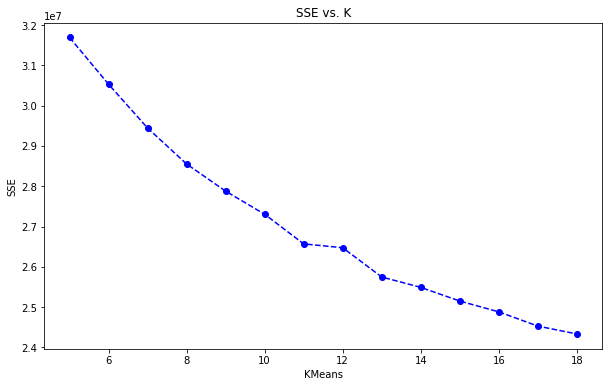

In [30]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
# plot centers vs scores

plt.figure(figsize=(10, 6))
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('KMeans');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [31]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# based on the above plot, select the optimum number of clusters
centers = 11

#intialize KMeans
kmeans = KMeans(centers)

# fit it on the dataset
kmeans_model = kmeans.fit(X_pca_azdias)

# predict and receive the labels for each row
labels_azdias = kmeans_model.predict(X_pca_azdias)

### Discussion 3.1: Apply Clustering to General Population

Started with 3 clusters and incremented number of clusters by 3 up to 30 clusters (i.e. range(3, 31, 3)). Then plotted the number of clusters vs score (SSE error). There was no obvious elbow. 

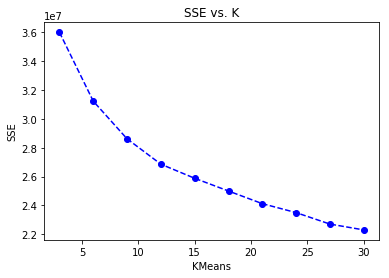

So, I decided to fine tune by attempting all the possibilities from 5 to 18 clusters (i.e. range(5, 19, 1)). When the number of clusters vs scores were plotted (as shown below), based on the plot, I decided to go ahead with 11 clusters (since the graph has an obvious elbow at 11 clusters).

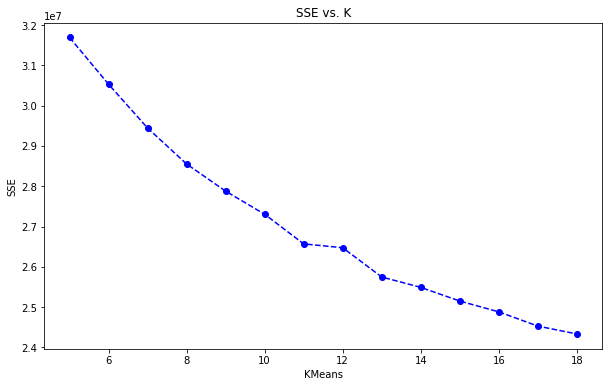

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [32]:
# Load in the customer demographics data.
customers = pd.read_csv('./Udacity_CUSTOMERS_Subset.csv', sep=';')

In [33]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

# set missing data to NaN, drop outlier columns, drop rows with more than 
# threshold erros, reencode categorical binary columns as needed, 
# decode columns into multiple columns as needed
print('\nCustomer dataset shape before cleaning the data: \n', customers.shape)
customers, n_rows_customers, n_rows_dropped_customers = clean_data(customers, row_threshold=9)
print('\nCustomer dataset shape before cleaning the data: \n', customers.shape)

# apply imputer and repalce NaNs with means
customers = replace_nans_with_means(customers)

# apply standard scaler 
X_customers = scaler.transform(customers)

# apply pca transform
X_pca_customers = pca.transform(X_customers)

# get all the components variances in a dataframe
customers_variances = pca_results(customers, pca)

# predict using KMeans' model
labels_customers = kmeans_model.predict(X_pca_customers)


Customer dataset shape before cleaning the data: 
 (191652, 85)
missing_or_unknown list is empty, skipping column:  GFK_URLAUBERTYP
missing_or_unknown list is empty, skipping column:  GREEN_AVANTGARDE
missing_or_unknown list is empty, skipping column:  ANZ_PERSONEN
missing_or_unknown list is empty, skipping column:  ANZ_TITEL
missing_or_unknown list is empty, skipping column:  ANZ_HH_TITEL
missing_or_unknown list is empty, skipping column:  KONSUMNAEHE
missing_or_unknown list is empty, skipping column:  GEBAEUDETYP_RASTER
missing_or_unknown list is empty, skipping column:  MOBI_REGIO
missing_or_unknown list is empty, skipping column:  ONLINE_AFFINITAET
missing_or_unknown list is empty, skipping column:  KBA13_ANZAHL_PKW

Dataset shape before dropping the columns: 
 (191652, 85)

Dataset shape after dropping the columns: 
 (191652, 79)

Dataset shape before dropping the rows: 
 (191652, 79)

Dataset shape after dropping the rows: 
 (136159, 79)

Dataset shape before dropping the non bi

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [34]:
# compare the proportions of datapoints in each cluster for the customer dataset 
# to the proportions of datapoints in each cluster for the general dataset.

# get the datapoint counts of each cluster of the general dataset and then calculate 
# the percentages for these counts
a = 100/(azdias.shape[0])
(unique_azdias, counts_azdias) = np.unique(labels_azdias, return_counts=True)
frequencies_azdias = np.asarray((unique_azdias, counts_azdias)).T
azdias_cluster_stats = pd.DataFrame(frequencies_azdias, columns = ['Cluster', 'Datapoints_A'])
azdias_cluster_stats['Percentage_A'] = azdias_cluster_stats.Datapoints_A * a

# get the datapoint counts of each cluster of the customer dataset and then calculate 
# the percentages for these counts
a = 100/(customers.shape[0])
(unique_customers, counts_customers) = np.unique(labels_customers, return_counts=True)
frequencies_customers = np.asarray((unique_customers, counts_customers)).T
customers_cluster_stats = pd.DataFrame(frequencies_customers, columns = ['Cluster', 'Datapoints_C'])
customers_cluster_stats['Percentage_C'] = customers_cluster_stats.Datapoints_C * a

cluster_stats = azdias_cluster_stats
cluster_stats['Datapoints_C'] = customers_cluster_stats['Datapoints_C']
cluster_stats['Percentage_C'] = customers_cluster_stats['Percentage_C']

# calculate the differences in the respective percentages to find the columns with the largest differences
cluster_stats['Percentage_Diff'] = azdias_cluster_stats.Percentage_A - customers_cluster_stats.Percentage_C

# add a cluster for the dropped rows from both the datasets.

# earlier we had dropped rows (with more than row_threashod NaNs) from both the datasets.
# when we compared  a few columns (with 0 NaNs) of the two subsets of the general dataset,  
# we found that their distributions were very different. So, let's treat these dropped rows 
# from both the datasets as a new cluster. So, let's append a new row to the cluster_stats
# dataframe

# Cluster number for the new cluster
clust_num = cluster_stats.shape[0]

# num of dropped rows of the generat dataset
datapoints_a = n_rows_dropped_azdias

# percentage of the dropped rows of the generat dataset
percentage_a = (n_rows_dropped_azdias/n_rows_azdias)*100

# num of dropped rows of the customers dataset
datapoints_c = n_rows_dropped_customers

# percentage of the dropped rows of the customers dataset
percentage_c = (n_rows_dropped_customers/n_rows_customers)*100

# percentage difference
percentage_diff = percentage_a - percentage_c

# create a list to append to the dataframe
to_append = [clust_num, datapoints_a, percentage_a, datapoints_c, percentage_c, percentage_diff]

# convert the list to a series
a_series = pd.Series(to_append, index = cluster_stats.columns)

# append cluster_stats dataframe
cluster_stats = cluster_stats.append(a_series, ignore_index=True)

cluster_stats['Cluster'] = cluster_stats['Cluster'].astype('int64')

print(cluster_stats)

    Cluster  Datapoints_A  Percentage_A  Datapoints_C  Percentage_C  \
0         0       98552.0     12.720605       12930.0      9.496251   
1         1       65120.0      8.405368        1253.0      0.920248   
2         2       58508.0      7.551924       45514.0     33.427096   
3         3       87498.0     11.293810       25799.0     18.947701   
4         4       94879.0     12.246513       14350.0     10.539149   
5         5       84450.0     10.900389        2015.0      1.479887   
6         6       82922.0     10.703162       11335.0      8.324826   
7         7       80276.0     10.361630        1372.0      1.007645   
8         8       57561.0      7.429690       16493.0     12.113044   
9         9        3290.0      0.424657        2754.0      2.022635   
10       10       61687.0      7.962253        2344.0      1.721517   
11       11      116478.0     13.069486       55493.0     28.955085   

    Percentage_Diff  
0          3.224355  
1          7.485120  
2        -

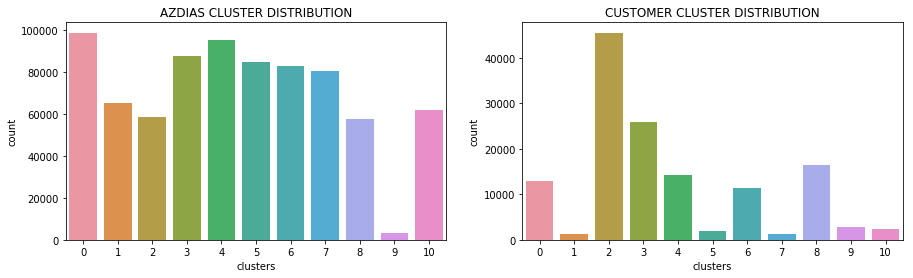

In [35]:
df_azdias = pd.DataFrame(labels_azdias, columns = ['clusters'])
df_customers = pd.DataFrame(labels_customers, columns = ['clusters'])

# plot countplot to compare the number of datapoints in each cluster of 
# general and customer datasets.
fig, ax =  plt.subplots(1, 2, figsize=(15, 4))
ax[0].title.set_text('AZDIAS CLUSTER DISTRIBUTION')
ax[1].title.set_text('CUSTOMER CLUSTER DISTRIBUTION')
sns.countplot(df_azdias['clusters'], ax=ax[0])
sns.countplot(df_customers['clusters'], ax=ax[1])
fig.show()

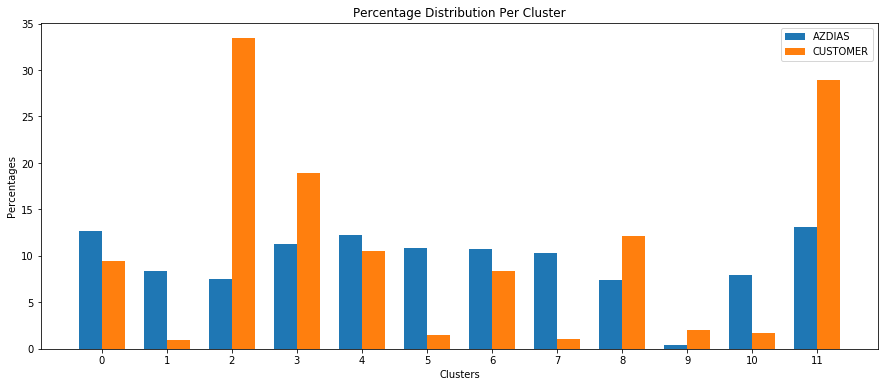

In [36]:
# bar chart comparision of the percentages of datapoints for both the clusters
n_clusters = cluster_stats.shape[0]
azdias_percent = tuple(list(cluster_stats['Percentage_A']))
customer_percent = tuple(list(cluster_stats['Percentage_C']))

ind = np.arange(n_clusters) 
width = 0.35

plt.figure(figsize=(15,6))
plt.bar(ind, azdias_percent, width, label='AZDIAS')
plt.bar(ind + width, customer_percent, width,
    label='CUSTOMER')

plt.xlabel('Clusters')
plt.ylabel('Percentages')
plt.title('Percentage Distribution Per Cluster')


plt.xticks(ind + width / 2, np.arange(0, n_clusters, 1))

plt.legend(loc='best')
plt.show()

In [37]:
# Find the cluster with the most negative difference in the percentages.
# It represnts a cluster where the customer datapoints have the biggest percentage representation
# as compared to the general datapoints
index_min = cluster_stats[['Percentage_Diff']].idxmin()[0]
print("Max proportion difference between the Customer and General Datasets is represented by cluster {}".format(index_min))

# Find the cluster with the most positive difference in the percentages.
# It represnts a cluster where the general datapoints have the biggest percentage representation
# as compared to the customer datapoints
index_max = cluster_stats[['Percentage_Diff']].idxmax()[0]
print("Max proportion difference between the General and Customer Datasets is represented by cluster {}".format(index_max))

Max proportion difference between the Customer and General Datasets is represented by cluster 2
Max proportion difference between the General and Customer Datasets is represented by cluster 5


In [38]:
# get the sorted Principal Components weights of the cluster with the largest relative 
# influence on the customer dataset 

cluster_center = kmeans_model.cluster_centers_[index_min]
cluster_center_df = pd.DataFrame(cluster_center, columns=['weights'])

# let's sort the absolute values while maintaining the positive and negative signs
cluster_center_df.reindex(cluster_center_df.abs().sort_values('weights',ascending=False).index).head(10)

,weights
0,-3.338732
2,2.761974
3,2.336102
4,-0.479013
14,-0.414683
5,-0.389814
18,-0.279218
15,0.251045
1,0.233866
9,-0.233060


In [39]:
# the PC which is most negatively influencing the cluster
interpret_pca(azdias_variances, 0+1)

,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,CAMEO_INTL_2015_WEALTH,HH_EINKOMMEN_SCORE,ORTSGR_KLS9,EWDICHTE,Explained Variance,FINANZ_HAUSBAUER,KBA05_ANTG4,PLZ8_ANTG2,ARBEIT,ANZ_HAUSHALTE_AKTIV,RELAT_AB,KBA05_ANTG3,FINANZ_SPARER,SEMIO_PFLICHT,SEMIO_REL,REGIOTYP,SEMIO_RAT,PRAEGENDE_JUGENDJAHRE_DECADE,SEMIO_TRADV,SEMIO_MAT,SEMIO_FAM,W_KEIT_KIND_HH,SEMIO_KULT,FINANZ_UNAUFFAELLIGER,SEMIO_KAEM,FINANZ_ANLEGER,PLZ8_HHZ,ANZ_HH_TITEL,KKK,SEMIO_SOZ,VERS_TYP,SEMIO_DOM,HEALTH_TYP,SEMIO_KRIT,ANREDE_KZ,KBA05_ANTG2,RETOURTYP_BK_S,SOHO_KZ,ANZ_TITEL,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,OST_WEST_KZ,WOHNDAUER_2008,MIN_GEBAEUDEJAHR,ONLINE_AFFINITAET,KBA13_ANZAHL_PKW,FINANZ_VORSORGER,WOHNLAGE,ALTERSKATEGORIE_GROB,ANZ_PERSONEN,GREEN_AVANTGARDE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,GEBAEUDETYP_RASTER,CAMEO_INTL_2015_LIFE_STAGE,BALLRAUM,LP_LEBENSPHASE_GROB,LP_LEBENSPHASE_FEIN,INNENSTADT,PLZ8_GBZ,KONSUMNAEHE,FINANZ_MINIMALIST,KBA05_GBZ,KBA05_ANTG1,PLZ8_ANTG1,MOBI_REGIO
Dimension 1,0.2243,0.2186,0.2139,0.2014,0.1973,0.1969,0.1946,0.1738,0.1639,0.1524,0.1523,0.1414,0.1335,0.1332,0.1282,0.1153,0.0861,0.0832,0.0711,0.0707,0.0705,0.0617,0.0607,0.0601,0.0559,0.0504,0.0497,0.0429,0.0424,0.0418,0.035,0.0342,0.034,0.0327,0.0256,0.0225,0.014,0.0103,0.0088,-0.0011,-0.0022,-0.0036,-0.0399,-0.052,-0.0536,-0.0536,-0.056,-0.0587,-0.0631,-0.0782,-0.0862,-0.0863,-0.088,-0.0948,-0.1036,-0.1036,-0.1169,-0.1181,-0.126,-0.1303,-0.145,-0.1634,-0.1668,-0.1669,-0.1999,-0.2112,-0.217,-0.2239,-0.2364


In [40]:
# the PC which is most positively influencing the cluster
interpret_pca(azdias_variances, 2+1)

,SEMIO_VERT,SEMIO_SOZ,SEMIO_FAM,SEMIO_KULT,FINANZ_MINIMALIST,RETOURTYP_BK_S,FINANZ_VORSORGER,Explained Variance,W_KEIT_KIND_HH,ALTERSKATEGORIE_GROB,SEMIO_REL,SEMIO_LUST,GREEN_AVANTGARDE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,SEMIO_MAT,ORTSGR_KLS9,PLZ8_BAUMAX,EWDICHTE,PLZ8_ANTG4,PLZ8_ANTG3,WOHNDAUER_2008,ARBEIT,RELAT_AB,PLZ8_ANTG2,KBA05_ANTG4,ANZ_HAUSHALTE_AKTIV,CAMEO_INTL_2015_WEALTH,ANZ_HH_TITEL,ANZ_TITEL,LP_LEBENSPHASE_FEIN,VERS_TYP,PLZ8_HHZ,LP_LEBENSPHASE_GROB,KBA05_ANTG3,SOHO_KZ,ANZ_PERSONEN,CAMEO_INTL_2015_LIFE_STAGE,REGIOTYP,KBA05_ANTG2,OST_WEST_KZ,KBA05_ANTG1,MIN_GEBAEUDEJAHR,HEALTH_TYP,KKK,KBA05_GBZ,MOBI_REGIO,KBA13_ANZAHL_PKW,WOHNLAGE,GEBAEUDETYP_RASTER,HH_EINKOMMEN_SCORE,BALLRAUM,KONSUMNAEHE,PLZ8_GBZ,INNENSTADT,PLZ8_ANTG1,ONLINE_AFFINITAET,FINANZ_HAUSBAUER,SEMIO_TRADV,SEMIO_PFLICHT,FINANZ_UNAUFFAELLIGER,PRAEGENDE_JUGENDJAHRE_DECADE,FINANZ_SPARER,SEMIO_ERL,FINANZ_ANLEGER,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,ANREDE_KZ
Dimension 3,0.3474,0.2633,0.2501,0.2347,0.1615,0.1071,0.0992,0.0892,0.0863,0.0776,0.071,0.0637,0.056,0.056,0.0552,0.0446,0.0442,0.0437,0.0419,0.0408,0.0338,0.0312,0.0286,0.027,0.0234,0.0209,0.0196,0.0123,0.0103,0.006,0.0051,0.004,0.0026,0.0019,0.0004,-0.0038,-0.0054,-0.0072,-0.0113,-0.0131,-0.0145,-0.015,-0.0178,-0.0189,-0.0191,-0.0215,-0.0218,-0.0225,-0.0282,-0.0289,-0.0335,-0.0347,-0.0354,-0.0408,-0.0413,-0.0488,-0.0511,-0.0773,-0.0783,-0.0964,-0.1045,-0.1056,-0.1763,-0.1886,-0.2161,-0.2754,-0.3133,-0.3383,-0.3692


In [41]:
# get the sorted Principal Components weights of the cluster with the smallest relative 
# influence on the customer dataset

cluster_center = kmeans_model.cluster_centers_[index_max]
cluster_center_df = pd.DataFrame(cluster_center, columns=['weights'])

# let's sort the absolute values while maintaining the positive and negative signs
cluster_center_df.reindex(cluster_center_df.abs().sort_values('weights', ascending=False).index).head(10)

,weights
2,-3.071137
1,-2.977888
0,-1.049059
8,0.553228
4,-0.335499
20,-0.207497
7,-0.152854
21,0.127786
14,0.123921
3,-0.113719


In [42]:
# the PC which is most negatively influencing the cluster
interpret_pca(azdias_variances, 2+1)

,SEMIO_VERT,SEMIO_SOZ,SEMIO_FAM,SEMIO_KULT,FINANZ_MINIMALIST,RETOURTYP_BK_S,FINANZ_VORSORGER,Explained Variance,W_KEIT_KIND_HH,ALTERSKATEGORIE_GROB,SEMIO_REL,SEMIO_LUST,GREEN_AVANTGARDE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,SEMIO_MAT,ORTSGR_KLS9,PLZ8_BAUMAX,EWDICHTE,PLZ8_ANTG4,PLZ8_ANTG3,WOHNDAUER_2008,ARBEIT,RELAT_AB,PLZ8_ANTG2,KBA05_ANTG4,ANZ_HAUSHALTE_AKTIV,CAMEO_INTL_2015_WEALTH,ANZ_HH_TITEL,ANZ_TITEL,LP_LEBENSPHASE_FEIN,VERS_TYP,PLZ8_HHZ,LP_LEBENSPHASE_GROB,KBA05_ANTG3,SOHO_KZ,ANZ_PERSONEN,CAMEO_INTL_2015_LIFE_STAGE,REGIOTYP,KBA05_ANTG2,OST_WEST_KZ,KBA05_ANTG1,MIN_GEBAEUDEJAHR,HEALTH_TYP,KKK,KBA05_GBZ,MOBI_REGIO,KBA13_ANZAHL_PKW,WOHNLAGE,GEBAEUDETYP_RASTER,HH_EINKOMMEN_SCORE,BALLRAUM,KONSUMNAEHE,PLZ8_GBZ,INNENSTADT,PLZ8_ANTG1,ONLINE_AFFINITAET,FINANZ_HAUSBAUER,SEMIO_TRADV,SEMIO_PFLICHT,FINANZ_UNAUFFAELLIGER,PRAEGENDE_JUGENDJAHRE_DECADE,FINANZ_SPARER,SEMIO_ERL,FINANZ_ANLEGER,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,ANREDE_KZ
Dimension 3,0.3474,0.2633,0.2501,0.2347,0.1615,0.1071,0.0992,0.0892,0.0863,0.0776,0.071,0.0637,0.056,0.056,0.0552,0.0446,0.0442,0.0437,0.0419,0.0408,0.0338,0.0312,0.0286,0.027,0.0234,0.0209,0.0196,0.0123,0.0103,0.006,0.0051,0.004,0.0026,0.0019,0.0004,-0.0038,-0.0054,-0.0072,-0.0113,-0.0131,-0.0145,-0.015,-0.0178,-0.0189,-0.0191,-0.0215,-0.0218,-0.0225,-0.0282,-0.0289,-0.0335,-0.0347,-0.0354,-0.0408,-0.0413,-0.0488,-0.0511,-0.0773,-0.0783,-0.0964,-0.1045,-0.1056,-0.1763,-0.1886,-0.2161,-0.2754,-0.3133,-0.3383,-0.3692


In [43]:
# the PC which is most positively influencing the cluster
interpret_pca(azdias_variances, 8+1)

,SEMIO_MAT,SEMIO_RAT,SEMIO_TRADV,SEMIO_PFLICHT,SEMIO_REL,WOHNDAUER_2008,FINANZ_VORSORGER,RETOURTYP_BK_S,REGIOTYP,SEMIO_KULT,KKK,FINANZ_HAUSBAUER,ANREDE_KZ,SEMIO_KAEM,PLZ8_ANTG1,GEBAEUDETYP_RASTER,W_KEIT_KIND_HH,ANZ_HAUSHALTE_AKTIV,KBA05_ANTG4,OST_WEST_KZ,LP_LEBENSPHASE_FEIN,FINANZ_MINIMALIST,CAMEO_INTL_2015_LIFE_STAGE,LP_LEBENSPHASE_GROB,EWDICHTE,ORTSGR_KLS9,ARBEIT,KONSUMNAEHE,KBA05_ANTG1,RELAT_AB,SEMIO_FAM,ANZ_PERSONEN,PLZ8_GBZ,ANZ_HH_TITEL,SEMIO_DOM,Explained Variance,ANZ_TITEL,HH_EINKOMMEN_SCORE,MOBI_REGIO,SEMIO_LUST,KBA13_ANZAHL_PKW,PLZ8_HHZ,SOHO_KZ,CAMEO_INTL_2015_WEALTH,KBA05_GBZ,SEMIO_KRIT,SEMIO_ERL,PLZ8_ANTG4,WOHNLAGE,KBA05_ANTG2,INNENSTADT,PLZ8_ANTG2,PRAEGENDE_JUGENDJAHRE_MOVEMENT,GREEN_AVANTGARDE,SEMIO_VERT,PLZ8_ANTG3,BALLRAUM,SEMIO_SOZ,PLZ8_BAUMAX,KBA05_ANTG3,MIN_GEBAEUDEJAHR,ALTERSKATEGORIE_GROB,FINANZ_ANLEGER,ONLINE_AFFINITAET,FINANZ_UNAUFFAELLIGER,FINANZ_SPARER,PRAEGENDE_JUGENDJAHRE_DECADE,HEALTH_TYP,VERS_TYP
Dimension 9,0.3156,0.2949,0.2458,0.2143,0.2011,0.1977,0.1956,0.1534,0.143,0.1066,0.1043,0.0976,0.0951,0.0902,0.0849,0.0807,0.0791,0.0782,0.0706,0.0695,0.0674,0.065,0.0645,0.0632,0.0625,0.0624,0.0584,0.0531,0.0528,0.0486,0.0483,0.0475,0.0471,0.0458,0.0266,0.0224,0.0191,0.0188,0.0172,0.0139,0.0096,0.0068,0.0048,-0.0049,-0.0076,-0.0301,-0.0399,-0.0524,-0.0533,-0.057,-0.0606,-0.0619,-0.0648,-0.0648,-0.0651,-0.0677,-0.0737,-0.074,-0.0806,-0.087,-0.1061,-0.1105,-0.144,-0.148,-0.1635,-0.1804,-0.2192,-0.2931,-0.3048


### Discussion 3.3: Compare Customer Data to Demographics Data

Above counterplot represents comparision between the number of datapoints assigned to each cluster for general population and customer data. And the bar plot compares the percentages of the general population and the customer data assigned to each cluster. It is eveident from both the plots that there are clusters which differ vastly between the two datasets.


General population's 7.551924% datapoints are assigned to cluster 2. While 33.427096% datapoints of the customer data are assigned to cluster 2. Thus there's a difference of -25.875173% between the two datasets for cluster 2.  That means, people in the 2nd cluster are the most relevant target audience for the company.

Cluster 2's most negative and most positive Principal Components are PC0 (weight = -3.338732) and PC2 (weight = 2.761974) respectively.

- Component 0 (Negatively weighted by Cluster 2) Important Features:
    - Features having most postive variances.
        - PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region)
        - PLZ8_ANTG4 (Number of 10+ family houses in the PLZ8 region)	
        - PLZ8_BAUMAX (Most common building type within the PLZ8 region)
    - Features having most negative variances
        - MOBI_REGIO (Movement patterns)
        - PLZ8_ANTG1 (Number of 1-2 family houses in the PLZ8 region)
        - KBA05_ANTG1 (Number of 1-2 family houses in the microcell)
 
             
- Component 2 (Positively weighted by Cluster 2) Important Features:
    - Features having most postive variances.
        - SEMIO_VERT (Dreamful Personality Typology)	
        - SEMIO_SOZ	(Socially-minded Personality Typology)
        - SEMIO_FAM (Family-minded Personality Typology)
    - Features having most negative variances
        - ANREDE_KZ (Gender)
        - SEMIO_KAEM (Combative attitude Personality Typology)
        - SEMIO_DOM (Dominant-minded Personality Typology)
        
Based on the above, Cluster 2 (which represents the best potential customer base) is influenced by (a) 1-2 family houses in PLZ8 and microcell (rich people) and (b) Dreamful, Social-minded and Family-minded people.


(2) General population's 10.900389% datapoints are assigned to cluster 5. While 1.479887% datapoints of the customer data are assigned to cluster 5. Thus there's a difference of 9.420501% between the two datasets for cluster 5.  That means, people in the 5th cluster do not fall into the target customer audience.


Cluster 5's most negative and most positive Principal Components are PC2 (weight = -3.071137) and PC8 (weight = 0.553228) respectively.

- Component 2 (Negatively weighted by Cluster 5) Important Features:
    - Features having most postive variances.
        - SEMIO_VERT (Dreamful Personality Typology)	
        - SEMIO_SOZ	(Socially-minded Personality Typology)
        - SEMIO_FAM (Family-minded Personality Typology)
    - Features having most negative variances
        - ANREDE_KZ (Gender)
        - SEMIO_KAEM (Combative attitude Personality Typology)
        - SEMIO_DOM (Dominant-minded Personality Typology)

- Component 8 (Positively weighted by Cluster 5) Important Features:
    - Features having most postive variances.
        - SEMIO_MAT	(Materialistic Personality Typology)
        - SEMIO_RAT	(Rational Personality Typology)
        - SEMIO_TRADV (Traditional-minded Personality Typology)
    - Features having most negative variances
        - VERS_TYP (Insurance Typology)
        - HEALTH_TYP (Health Typology)
        - PRAEGENDE_JUGENDJAHRE_DECADE (Decade of the deminating movement of the person's youth) 
        
Based on the above, Cluster 5 (which represents the least likely potential customers) is influenced by (a) Gender and Combative & Dominant-minded people and (b) Materialistic, Rational and Traditional Minded people.

Note: I added one more cluster (Cluster 11) for the dropped rows from both the datasets. The percentage difference between the dropped rows in general dataset vs. dropped rows in the customer dataset is -15.885600%. Which represents the second largest percentage difference favoring customer's dataset. So, dropping these rows was not a good idea as they represent potential customers.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.